In [247]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [248]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv -O hw-3.csv

--2022-09-24 19:00:03--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘hw-3.csv’

hw-3.csv            100%[===================>]   1.36M  8.18MB/s    in 0.2s    

2022-09-24 19:00:03 (8.18 MB/s) - ‘hw-3.csv’ saved [1423529/1423529]



In [249]:
df = pd.read_csv('hw-3.csv')

In [250]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [251]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [253]:
df.median_house_value.sort_values()

9188      14999.0
19802     14999.0
2799      14999.0
2521      14999.0
5887      17500.0
           ...   
16938    500001.0
16936    500001.0
16935    500001.0
8291     500001.0
18055    500001.0
Name: median_house_value, Length: 20640, dtype: float64

In [254]:
for i,v in df.isnull().sum().items():
    if v > 0:
        print(i,v)

total_bedrooms 207


In [255]:
df = df.fillna(0)
for i,v in df.isnull().sum().items():
    if v > 0:
        print(i,v)

In [256]:
df['rooms_per_household'] = df.total_rooms/df.households
df['bedrooms_per_room'] = df.total_bedrooms/df.total_rooms
df['population_per_household'] = df.population/df.households

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [258]:
df.ocean_proximity.value_counts(dropna=False)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [259]:
df.ocean_proximity.mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [260]:
df.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [261]:
df.ocean_proximity = df.ocean_proximity.str.lower().str.replace(' ', '_')

In [262]:
df.ocean_proximity.value_counts(dropna=False)

<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: ocean_proximity, dtype: int64

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
train_ratio = 0.60
test_ratio = 0.20
#val_ratio = 0.20

val_ratio = (1/(train_ratio+test_ratio)) - 1
print(val_ratio)

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=val_ratio, random_state=42)


0.25


In [265]:
len(df_train), len(df_train)/len(df), len(df_val), len(df_val)/len(df), len(df_test), len(df_test)/len(df)

(12384, 0.6, 4128, 0.2, 4128, 0.2)

In [266]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [267]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,241400.0,<1h_ocean,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,near_ocean,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,64100.0,inland,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,277200.0,<1h_ocean,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,417000.0,near_ocean,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,154200.0,<1h_ocean,3.748996,0.305838,1.909639
12380,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,146400.0,inland,5.720486,0.171472,3.956597
12381,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,215300.0,<1h_ocean,5.549834,0.182879,3.242525
12382,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,139000.0,<1h_ocean,4.414286,0.229126,2.085714


In [268]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [269]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,12374,12375,12376,12377,12378,12379,12380,12381,12382,12383
longitude,-119.67,-118.32,-121.62,-118.63,-122.3,-118.11,-118.37,-118.39,-118.54,-119.23,...,-118.36,-118.44,-121.27,-118.13,-118.49,-118.29,-121.34,-116.99,-117.87,-118.32
latitude,34.43,33.74,39.13,34.24,37.52,33.73,34.14,34.06,34.3,36.39,...,33.79,34.03,38.11,34.02,34.02,33.79,38.04,32.74,33.84,33.91
housing_median_age,39.0,24.0,41.0,9.0,38.0,32.0,21.0,39.0,22.0,39.0,...,34.0,25.0,11.0,38.0,29.0,16.0,16.0,18.0,16.0,35.0
total_rooms,1467.0,6097.0,1317.0,4759.0,2769.0,1258.0,4670.0,3299.0,4423.0,1660.0,...,5166.0,2059.0,3163.0,1243.0,2709.0,1867.0,3295.0,3341.0,1545.0,940.0
total_bedrooms,381.0,794.0,309.0,924.0,387.0,333.0,1161.0,831.0,622.0,349.0,...,704.0,659.0,794.0,310.0,799.0,571.0,565.0,611.0,354.0,197.0
population,1404.0,2248.0,856.0,1884.0,994.0,645.0,1914.0,1649.0,1995.0,1061.0,...,2071.0,1349.0,2106.0,788.0,1238.0,951.0,2279.0,1952.0,730.0,640.0
households,374.0,806.0,337.0,915.0,395.0,334.0,1094.0,759.0,582.0,306.0,...,668.0,588.0,762.0,286.0,793.0,498.0,576.0,602.0,350.0,215.0
median_income,2.3681,10.1357,1.6719,4.8333,5.5902,5.0476,3.7986,3.3295,8.2159,1.4812,...,8.3609,3.2396,2.4482,2.5852,3.1563,3.3427,3.6083,3.9844,4.5112,4.2
median_house_value,241400.0,500001.0,64100.0,277200.0,417000.0,500001.0,367700.0,500001.0,376200.0,53500.0,...,500001.0,352400.0,103000.0,185100.0,330000.0,154200.0,146400.0,215300.0,139000.0,181300.0
ocean_proximity,<1h_ocean,near_ocean,inland,<1h_ocean,near_ocean,near_ocean,<1h_ocean,<1h_ocean,<1h_ocean,inland,...,near_ocean,<1h_ocean,inland,<1h_ocean,<1h_ocean,<1h_ocean,inland,<1h_ocean,<1h_ocean,<1h_ocean


In [270]:
mean = round(df_train.median_house_value.mean(),1)
mean

206807.7

In [271]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [272]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [273]:
df_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.925005,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.034814,0.102320,0.011022
latitude,-0.925005,1.000000,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,0.119118,-0.124507,-0.002301
housing_median_age,-0.099812,0.002477,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,-0.181275,0.129456,0.012167
total_rooms,0.036449,-0.025914,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.168926,-0.194185,-0.029452
total_bedrooms,0.063840,-0.059730,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.010381,0.078094,-0.034301
population,0.091670,-0.100272,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.076210,0.031592,0.064998
households,0.049762,-0.063529,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,-0.085832,0.058004,-0.032522
median_income,-0.016426,-0.076805,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.394154,-0.616617,-0.000454
rooms_per_household,-0.034814,0.119118,-0.181275,0.168926,0.010381,-0.076210,-0.085832,0.394154,1.000000,-0.500589,0.001801
bedrooms_per_room,0.102320,-0.124507,0.129456,-0.194185,0.078094,0.031592,0.058004,-0.616617,-0.500589,1.000000,-0.002851


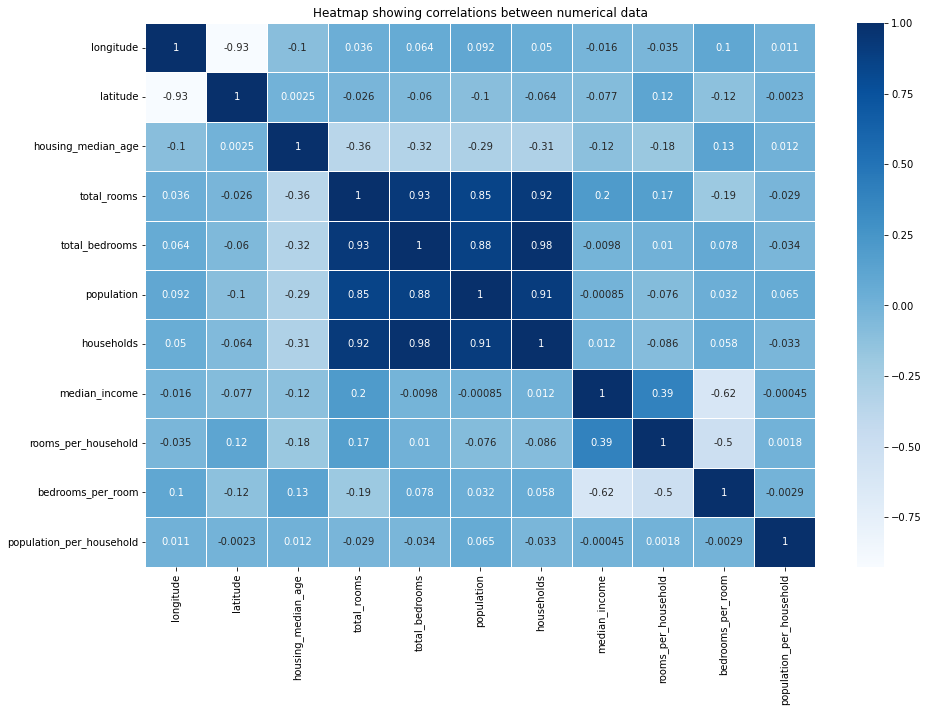

In [274]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_train.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [275]:
out = df_train.corr().unstack().sort_values(ascending = False)
print(out.to_string())

longitude                 longitude                   1.000000
latitude                  latitude                    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_income             median_income               1.000000
households                households                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
population                population                  1.000000
population_per_household  population_per_household    1.000000
total_bedrooms            households                  0.979399
households                total_bedrooms              0.979399
total_bedrooms            total_rooms                 0.931546
total_rooms               total_bedrooms              0.931546
households                total_rooms                 0

In [276]:
df_orig = df.copy()

In [587]:
df = df_orig.copy()
mean = round(df.median_house_value.mean(),1)

df['above_average'] = (df.median_house_value>mean).astype(int)

del df['median_house_value']

train_ratio = 0.60
test_ratio = 0.20
#val_ratio = 0.20

val_ratio = (1/(train_ratio+test_ratio)) - 1

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=val_ratio, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

df_train_orig = df_train.copy()

#del df_train['above_average']
#del df_val['above_average']
#del df_test['above_average']

In [588]:
categorical = ['ocean_proximity']

numerical = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
             #,
      # 'rooms_per_household', 'bedrooms_per_room',
      # 'population_per_household']

In [589]:
from IPython.display import display

In [590]:
from sklearn.metrics import mutual_info_score

In [591]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(round(df_mi,2))

,MI
ocean_proximity,0.1


In [592]:
df_full_train[categorical].nunique()

ocean_proximity    5
dtype: int64

In [593]:
df_full_train[categorical]

,ocean_proximity
14196,near_ocean
8267,near_ocean
17445,near_ocean
14265,near_ocean
2271,inland
...,...
11284,<1h_ocean
11964,inland
5390,<1h_ocean
860,<1h_ocean


In [594]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [595]:
from sklearn.feature_extraction import DictVectorizer

In [596]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [597]:
train_dict[0]

{'ocean_proximity': '<1h_ocean',
 'longitude': -119.67,
 'latitude': 34.43,
 'housing_median_age': 39.0,
 'total_rooms': 1467.0,
 'total_bedrooms': 381.0,
 'population': 1404.0,
 'households': 374.0,
 'median_income': 2.3681}

In [598]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [599]:
X_train.shape

(12384, 13)

In [600]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1h_ocean',
       'ocean_proximity=inland', 'ocean_proximity=island',
       'ocean_proximity=near_bay', 'ocean_proximity=near_ocean',
       'population', 'total_bedrooms', 'total_rooms'], dtype=object)

In [601]:
from sklearn.linear_model import LogisticRegression

In [602]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [603]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [604]:
model.predict_proba(X_val)

array([[0.92071903, 0.07928097],
       [0.82099949, 0.17900051],
       [0.0480028 , 0.9519972 ],
       ...,
       [0.03909008, 0.96090992],
       [0.14971755, 0.85028245],
       [0.52088473, 0.47911527]])

In [605]:
y_pred = model.predict_proba(X_val)[:, 1]

In [606]:
y_pred

array([0.07928097, 0.17900051, 0.9519972 , ..., 0.96090992, 0.85028245,
       0.47911527])

In [607]:
above_average = (y_pred > 0.5).astype(int)

In [608]:
above_average

array([0, 0, 1, ..., 1, 1, 0])

In [609]:
y_val

array([0, 0, 1, ..., 1, 1, 0])

In [610]:
acc_full = round((y_val == above_average).mean(),5)
acc_full

0.83551

In [611]:
all = categorical + numerical

In [612]:
tmp = all.copy()
l = len(tmp)

accs = {}

for i in tmp:
    accs[i] = [0.0, 0.0]
    
display(accs)

{'ocean_proximity': [0.0, 0.0],
 'longitude': [0.0, 0.0],
 'latitude': [0.0, 0.0],
 'housing_median_age': [0.0, 0.0],
 'total_rooms': [0.0, 0.0],
 'total_bedrooms': [0.0, 0.0],
 'population': [0.0, 0.0],
 'households': [0.0, 0.0],
 'median_income': [0.0, 0.0]}

In [613]:
for i in range(l):
    df_train = df_train_orig.copy()
    tmp = all.copy()
    out = tmp.pop(i)
    #print(i,len(tmp),out,tmp,'\n')

    train_dict = df_train[tmp].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

#    display(dv.get_feature_names_out())

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[tmp].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model.predict_proba(X_val)

    y_pred = model.predict_proba(X_val)[:, 1]

    above_average = (y_pred > 0.5).astype(int)

    acc = round((y_val == above_average).mean(),5)

    diff = round((acc_full - acc),5)

    accs[out] = [acc, diff]

In [614]:
accs

{'ocean_proximity': [0.81807, 0.01744],
 'longitude': [0.83406, 0.00145],
 'latitude': [0.83406, 0.00145],
 'housing_median_age': [0.82994, 0.00557],
 'total_rooms': [0.83721, -0.0017],
 'total_bedrooms': [0.83745, -0.00194],
 'population': [0.82025, 0.01526],
 'households': [0.83212, 0.00339],
 'median_income': [0.78391, 0.0516]}

In [615]:
print(accs['total_rooms'])
print(accs['total_bedrooms'])
print(accs['population'])
print(accs['households'])

[0.83721, -0.0017]
[0.83745, -0.00194]
[0.82025, 0.01526]
[0.83212, 0.00339]


In [629]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [639]:
df = df_orig.copy()

del df['ocean_proximity']

train_ratio = 0.60
test_ratio = 0.20
#val_ratio = 0.20

val_ratio = (1/(train_ratio+test_ratio)) - 1

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=val_ratio, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

df_train_orig = df_train.copy()

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

categorical = ['ocean_proximity']

numerical = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'
             ,
      'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']   

#train_dict = df_train[numerical].to_dict(orient='records')

#dv = DictVectorizer(sparse=False)
#dv.fit(train_dict)

#X_train = dv.transform(train_dict)

X_train = df_train.values

for a in [0, 0.01, 0.1, 1, 10]:
    
    model = Ridge(alpha=a, solver="sag", random_state=42)

    model.fit(X_train, y_train)

    #val_dict = df_val[numerical].to_dict(orient='records')
    #X_val = dv.transform(val_dict)
    X_val = df_val.values

    model.predict(X_val)

    y_pred = model.predict(X_val)

    print(a, round(mean_squared_error(y_val, y_pred, squared=False),3))

0 0.524
0.01 0.524
0.1 0.524
1 0.524
10 0.524
